<a href="https://colab.research.google.com/github/kapibara3chi/DeepLearningPredictionOfScalarValue/blob/main/DeepLearningPredictionOfScalarValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.I.
- [ ] csvデータの読み込み
- [x] 精度の確認方法
- [x] 精度の改善方法
- [▶] モデル構成、 ハイパーパラメーターの最適化方法の実装
  - [x] BatchNormalization　各層の正規化
  - [ ] 同一 ハイパーパラメータでの最適モデルの選択方法の実装
  - [x] 最適化アルゴリズムを利用した最適モデルの選択
  - [x] モデルの保存、外部出力方法
  - [x] 最適化されたモデルでのモデルの再構築
  - [x] 外部モデルの参照方法
  - [x] 最適化モデルの保存 → 途中から再開
  - [x] グラフ化散布図
  - [ ] 過学習防止
  - [ ] プルーニングの実装
  - [ ] MinMax scalerとstandard scalerどっちがいい？
  - [ ] パラメーターの最適化は離散値のほうがいい？
  - [x] [[バッチサイズのハイパーパラメータ最適化への考慮]]
  - [x] 履歴の外部出力[[最適化履歴を外部ファイルに保存]]
  - [ ] ベイズ最適化以外の手法の精度調査

# 0.pip

In [ ]:
!pip install numpy tensorflow scikit-learn

# 基本コードの理解

## code

train data
data shape(404, 13)
data type:<class 'numpy.ndarray'>
data ex:[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]
Number of test data:102
(102, 13)
Number of train data:404
(404, 13)
行数:404,列数:13
13
Epoch 1/100
41/41 [==============================] - 2s 21ms/step - loss: 172.0403 - mae: 9.9192 - val_loss: 84.8795 - val_mae: 6.6094
Epoch 2/100
41/41 [==============================] - 0s 8ms/step - loss: 97.9450 - mae: 7.1545 - val_loss: 84.8338 - val_mae: 6.9471
Epoch 3/100
41/41 [==============================] - 0s 7ms/step - loss: 66.8656 -

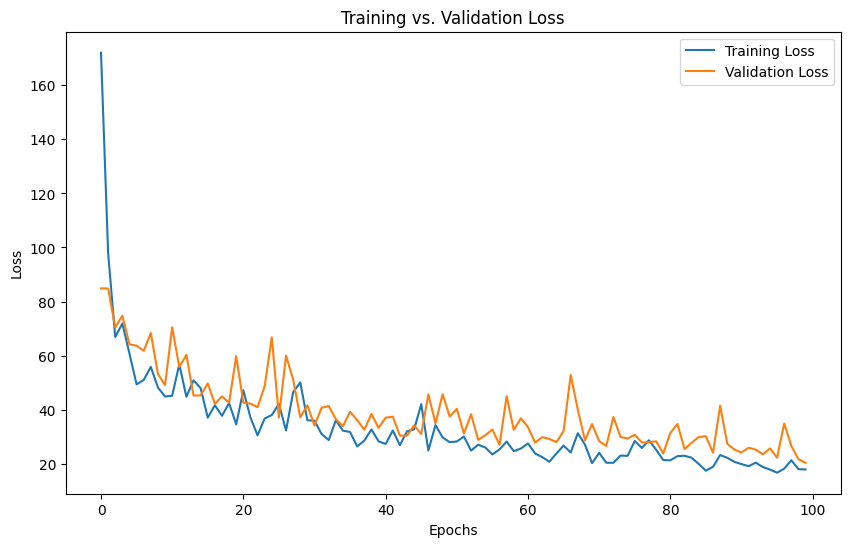

4/4 [==============================] - 0s 4ms/step
予測された住宅価格: 12.17, 実際の住宅価格: 7.2
予測された住宅価格: 20.81, 実際の住宅価格: 18.8
予測された住宅価格: 22.49, 実際の住宅価格: 19.0
予測された住宅価格: 31.26, 実際の住宅価格: 27.0
予測された住宅価格: 23.35, 実際の住宅価格: 22.2
予測された住宅価格: 21.53, 実際の住宅価格: 24.5
予測された住宅価格: 29.23, 実際の住宅価格: 31.2
予測された住宅価格: 23.35, 実際の住宅価格: 22.9
予測された住宅価格: 19.46, 実際の住宅価格: 20.5
予測された住宅価格: 19.32, 実際の住宅価格: 23.2
予測された住宅価格: 15.38, 実際の住宅価格: 18.6
予測された住宅価格: 19.55, 実際の住宅価格: 14.5
予測された住宅価格: 18.70, 実際の住宅価格: 17.8
予測された住宅価格: 35.76, 実際の住宅価格: 50.0
予測された住宅価格: 19.20, 実際の住宅価格: 20.8
予測された住宅価格: 21.62, 実際の住宅価格: 24.3
予測された住宅価格: 25.04, 実際の住宅価格: 24.2
予測された住宅価格: 21.27, 実際の住宅価格: 19.8
予測された住宅価格: 17.57, 実際の住宅価格: 19.1
予測された住宅価格: 26.39, 実際の住宅価格: 22.7
予測された住宅価格: 11.73, 実際の住宅価格: 12.0
予測された住宅価格: 12.77, 実際の住宅価格: 10.2
予測された住宅価格: 20.23, 実際の住宅価格: 20.0
予測された住宅価格: 16.36, 実際の住宅価格: 18.5
予測された住宅価格: 24.19, 実際の住宅価格: 20.9
予測された住宅価格: 23.20, 実際の住宅価格: 23.0
予測された住宅価格: 28.03, 実際の住宅価格: 27.5
予測された住宅価格: 39.49, 実際の住宅価格: 30.1
予測された住宅価格: 14.27, 実際の住宅価格: 9.5
予測された住宅価格: 23.95, 実際の住宅

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sys


# データの読み込み
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
## データの確認
print("train data")
print(f"data shape{train_data.shape}")
print(f"data type:{type(train_data)}")
print(f"data ex:{train_data}")
print(f"Number of test data:{len(test_data)}")
print(test_data.shape)
print(f"Number of train data:{len(train_data)}")
print(train_data.shape)

num_rows,num_cols=train_data.shape
print(f"行数:{num_rows},列数:{num_cols}")
print(train_data.shape[1])
# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
#input_shape:データ列数のタプル※単一次元なので(,)つき
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 出力層

# モデルのコンパイル
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 過学習の防止 Early stopping
# from tensorflow.keras.callbacks import EarlyStopping
## EarlyStoppingコールバックを作成
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# モデルの学習
# history=model.fit(train_data, train_labels, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping_callback])
history=model.fit(train_data, train_labels, epochs=100, batch_size=8, validation_split=0.2)

# モデルの評価
test_loss, test_mae = model.evaluate(test_data, test_labels)
# test_loss, test_mae = model.evaluate(test_data, test_labels,verbose=1)
print(f"Test Loss:{test_loss:.3f}")
print(f"Test MAE: {test_mae:.2f}")



import matplotlib.pyplot as plt
# トレーニングと検証の損失をプロット
print(type(history.history))
print(f"loss :{history.history['loss']}")
print(f"loss numb:{len(history.history['loss'])}")
print(f"val loss :{history.history['val_loss']}")
print(f"val_loss numb:{len(history.history['val_loss'])}")
# モデルの学習曲線をプロット
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

# テストデータセット上で予測を行う
predictions = model.predict(test_data)

# 予測結果を出力する
for i, prediction in enumerate(predictions):
    print(f"予測された住宅価格: {prediction[0]:.2f}, 実際の住宅価格: {test_labels[i]}")




# 過学習の防止の実装

## code

行数:404,列数:13
13
Epoch 1/100
41/41 [==============================] - 1s 11ms/step - loss: 445.1086 - mae: 14.1150 - val_loss: 71.3842 - val_mae: 5.9245
Epoch 2/100
41/41 [==============================] - 0s 5ms/step - loss: 70.6680 - mae: 6.1514 - val_loss: 83.3248 - val_mae: 6.0561
Epoch 3/100
41/41 [==============================] - 0s 6ms/step - loss: 66.1151 - mae: 5.9732 - val_loss: 67.1715 - val_mae: 5.7973
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 69.1602 - mae: 6.1107 - val_loss: 100.1116 - val_mae: 6.6822
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 63.5741 - mae: 5.6045 - val_loss: 65.4690 - val_mae: 5.3197
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 57.9140 - mae: 5.3223 - val_loss: 62.6856 - val_mae: 5.3927
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 58.0403 - mae: 5.3729 - val_loss: 67.9184 - val_mae: 6.2043
Epoch 8/100
41/41 [==============================

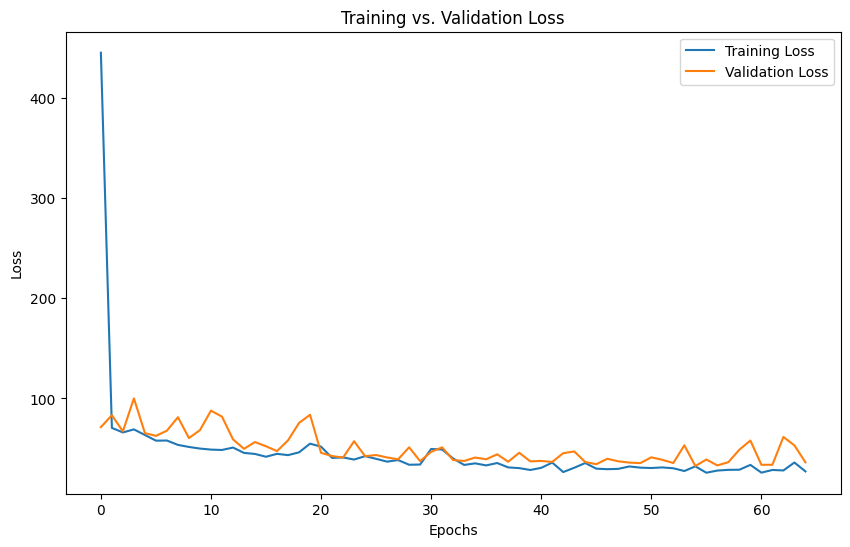

'\n# テストデータセット上で予測を行う\npredictions = model.predict(test_data)\n\n# 予測結果を出力する\nfor i, prediction in enumerate(predictions):\n    print(f"予測された住宅価格: {prediction[0]:.2f}, 実際の住宅価格: {test_labels[i]}")\n'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sys


# データの読み込み
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
## データの確認
# print("train data")
# print(f"data shape{train_data.shape}")
# print(f"data type:{type(train_data)}")
# print(f"data ex:{train_data}")
# print(f"Number of test data:{len(test_data)}")
# print(test_data.shape)
# print(f"Number of train data:{len(train_data)}")
# print(train_data.shape)

num_rows,num_cols=train_data.shape
print(f"行数:{num_rows},列数:{num_cols}")
print(train_data.shape[1])
# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
#input_shape:データ列数のタプル※単一次元なので(,)つき
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 出力層

# モデルのコンパイル
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 過学習の防止 Early stopping
from tensorflow.keras.callbacks import EarlyStopping
## EarlyStoppingコールバックを作成
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# モデルの学習
history=model.fit(train_data, train_labels, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping_callback])

# モデルの評価
test_loss, test_mae = model.evaluate(test_data, test_labels)
# test_loss, test_mae = model.evaluate(test_data, test_labels,verbose=1)
print(f"Test Loss:{test_loss:.3f}")
print(f"Test MAE: {test_mae:.2f}")


import matplotlib.pyplot as plt
# トレーニングと検証の損失をプロット
print(type(history.history))
print(f"loss :{history.history['loss']}")
print(f"loss numb:{len(history.history['loss'])}")
print(f"val loss :{history.history['val_loss']}")
print(f"val_loss numb:{len(history.history['val_loss'])}")
# モデルの学習曲線をプロット
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()




'''
# テストデータセット上で予測を行う
predictions = model.predict(test_data)

# 予測結果を出力する
for i, prediction in enumerate(predictions):
    print(f"予測された住宅価格: {prediction[0]:.2f}, 実際の住宅価格: {test_labels[i]}")
'''




# 同一パラメータでのモデルの選択

## code

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sys


# データの読み込み
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
## データの確認
# print("train data")
# print(f"data shape{train_data.shape}")
# print(f"data type:{type(train_data)}")
# print(f"data ex:{train_data}")
# print(f"Number of test data:{len(test_data)}")
# print(test_data.shape)
# print(f"Number of train data:{len(train_data)}")
# print(train_data.shape)

num_rows,num_cols=train_data.shape
print(f"行数:{num_rows},列数:{num_cols}")
print(train_data.shape[1])
# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
#input_shape:データ列数のタプル※単一次元なので(,)つき
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 出力層

# モデルのコンパイル
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 過学習の防止 Early stopping
from tensorflow.keras.callbacks import EarlyStopping
## EarlyStoppingコールバックを作成
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# モデルの学習
history=model.fit(train_data, train_labels, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping_callback])

# モデルの評価
test_loss, test_mae = model.evaluate(test_data, test_labels)
# test_loss, test_mae = model.evaluate(test_data, test_labels,verbose=1)
print(f"Test Loss:{test_loss:.3f}")
print(f"Test MAE: {test_mae:.2f}")

# 最適モデルの選択


import matplotlib.pyplot as plt
# トレーニングと検証の損失をプロット
print(type(history.history))
print(f"loss :{history.history['loss']}")
print(f"loss numb:{len(history.history['loss'])}")
print(f"val loss :{history.history['val_loss']}")
print(f"val_loss numb:{len(history.history['val_loss'])}")
# モデルの学習曲線をプロット
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()




'''
# テストデータセット上で予測を行う
predictions = model.predict(test_data)

# 予測結果を出力する
for i, prediction in enumerate(predictions):
    print(f"予測された住宅価格: {prediction[0]:.2f}, 実際の住宅価格: {test_labels[i]}")
'''




# 修正版

## code

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# データの読み込み
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 特徴エンジニアリング
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(1))  # 出力層

# モデルのコンパイル
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# データの分割
X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, train_labels, test_size=0.2, random_state=42)

# モデルの学習
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))

# テストデータで予測
predictions = model.predict(test_data_scaled)

# 予測結果の表示
for i in range(len(predictions)):
    print(f"Predicted price for test sample {i+1}: {predictions[i][0]:.2f}")


Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 578.0020 - mae: 21.9834 - val_loss: 399.1860 - val_mae: 18.4708
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 484.7554 - mae: 19.6662 - val_loss: 300.9702 - val_mae: 15.6599
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 335.5976 - mae: 15.6595 - val_loss: 164.1272 - val_mae: 11.0418
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 153.3750 - mae: 9.8638 - val_loss: 58.3031 - val_mae: 6.1396
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 62.4075 - mae: 5.8590 - val_loss: 36.7153 - val_mae: 4.7353
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 42.9342 - mae: 4.6946 - val_loss: 27.6430 - val_mae: 4.0705
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 32.4276 - mae: 4.0021 - val_loss: 24.0610 - val_mae: 3.6930
Epoch 8/100
21/21 [==============================] - 0s

# Optuna

## 0.pip

In [ ]:
!pip install optuna tensorflow
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.7 MB/s eta 0:00:00


## :optuna example

### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 合成回帰データセットを生成
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データをスケーリング
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 目的関数を定義
def objective(trial):
    # ハイパーパラメータの値を提案
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units = trial.suggest_int('n_units', 32, 128)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)

    # 提案されたハイパーパラメータでKerasモデルを構築
    model = tf.keras.Sequential()
    model.add(Dense(n_units, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # モデルをコンパイル
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # モデルを訓練
    model.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)

    # テストセットでモデルを評価
    loss = model.evaluate(X_test, y_test, verbose=0)

    # 損失を返す
    return loss

# Studyオブジェクトを作成し、最小化方向を指定
study = optuna.create_study(direction='minimize')

# Studyを最適化
study.optimize(objective, n_trials=30)

# 結果を出力
print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


# # モデルを保存
# model.save('optimized_regression_model.h5')



[I 2024-04-01 21:21:30,467] A new study created in memory with name: no-name-91d4f8a2-37b1-4f5f-a494-978cbdcdb7b3
<ipython-input-8-ea325fbe88c8>:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-04-01 21:21:35,805] Trial 0 finished with value: 36478.60546875 and parameters: {'n_layers': 1, 'n_units': 82, 'learning_rate': 0.00018212888032280843}. Best is trial 0 with value: 36478.60546875.
[I 2024-04-01 21:21:39,919] Trial 1 finished with value: 1613.10595703125 and parameters: {'n_layers': 1, 'n_units': 53, 'learning_rate': 0.0013627935533831665}. Best is trial 1 with value: 1613.10595703125.
[I 2024-04-01 21:21:47,042] Trial 2 finished with value: 54.0294189453125 and parameters: {'n_layers': 2, 'n_units': 108, 'learning_rate': 0.026647599662789928}.

Number of finished trials: 30
Best trial:
  Value: 8.756564140319824
  Params: 
    n_layers: 3
    n_units: 96
    learning_rate: 0.036609891284943595
Model summary


NameError: name 'model' is not defined

### 各層を最適化

 #### ⇒ トライアルエラーなし

#### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 合成回帰データセットを生成
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データをスケーリング
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 目的関数を定義
def objective(trial):
    # ハイパーパラメータの値を提案
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units_per_layer = [trial.suggest_int(f'n_units_layer{i}', 32, 128) for i in range(n_layers)]
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)

    # 提案されたハイパーパラメータでKerasモデルを構築
    model = tf.keras.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    for units in n_units_per_layer[1:]:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # モデルをコンパイル
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # モデルを訓練
    model.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)

    # テストセットでモデルを評価
    loss = model.evaluate(X_test, y_test, verbose=0)

    # 損失を返す
    return loss

# Studyオブジェクトを作成し、最小化方向を指定
study = optuna.create_study(direction='minimize')

# Studyを最適化
study.optimize(objective, n_trials=30)

# 結果を出力
print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('  Value: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-04-03 21:10:13,924] A new study created in memory with name: no-name-5eff137b-e9d6-4340-833f-c230f9fac97f
<ipython-input-2-e2de25f02db3>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
[I 2024-04-03 21:10:20,042] Trial 0 finished with value: 38733.63671875 and parameters: {'n_layers': 1, 'n_units_layer0': 42, 'learning_rate': 1.3542432485941736e-05}. Best is trial 0 with value: 38733.63671875.
[I 2024-04-03 21:10:26,260] Trial 1 finished with value: 64.08811950683594 and parameters: {'n_layers': 3, 'n_units_layer0': 68, 'n_units_layer1': 118, 'n_units_layer2': 120, 'learning_rate': 0.03019929299557947}. Best is trial 1 with value: 64.08811950683594.
[I 2024-04-03 21:10:31,741] Trial 2 finished with value: 81.33654022216797 and parameters: {'n_layers

Number of finished trials: 30
Best trial:
  Value: 4.805978775024414
  Params: 
    n_layers: 1
    n_units_layer0: 73
    learning_rate: 0.057697414836332166


## 最適化パラメータ増加(各層最適化)

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

# データセットの準備（ここでは合成データセットを使用）
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データのスケーリング
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 目的関数の定義
def objective(trial):
    # オプティマイザの選択
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    # optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)

    # モデルの構築
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))
    n_layers = trial.suggest_int('n_layers', 1, 5)
    for i in range(n_layers):
        num_hidden = trial.suggest_int('n_units_l{}'.format(i), 4, 128, log=True)
        model.add(Dense(num_hidden, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    # if optimizer_name == 'Adam':
    #     optimizer = Adam(lr=lr)
    # elif optimizer_name == 'SGD':
    #     optimizer = SGD(lr=lr)
    # else:
    #     optimizer = RMSprop(lr=lr)

    # モデルのコンパイル
    # model.compile(optimizer=optimizer, loss='mean_squared_error')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error')

    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    return loss

# Studyオブジェクトの作成
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# 最適化されたハイパーパラメータの出力
print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-04-03 21:18:37,669] A new study created in memory with name: no-name-1acd171a-927e-49b9-8774-cd955fd5c651
[I 2024-04-03 21:18:56,123] Trial 0 finished with value: 38683.11328125 and parameters: {'lr': 1.8107443832589656e-05, 'n_layers': 4, 'n_units_l0': 4, 'n_units_l1': 8, 'n_units_l2': 7, 'n_units_l3': 67}. Best is trial 0 with value: 38683.11328125.
[I 2024-04-03 21:19:05,093] Trial 1 finished with value: 338.6212463378906 and parameters: {'lr': 0.0022848219721061614, 'n_layers': 1, 'n_units_l0': 29}. Best is trial 1 with value: 338.6212463378906.
[I 2024-04-03 21:19:14,720] Trial 2 finished with value: 14110.8515625 and parameters: {'lr': 7.338369732511298e-05, 'n_layers': 4, 'n_units_l0': 13, 'n_units_l1': 19, 'n_units_l2': 54, 'n_units_l3': 6}. Best is trial 1 with value: 338.6212463378906.
[I 2024-04-03 21:19:37,759] Trial 3 finished with value: 2586.99267578125 and parameters: {'lr': 9.608392140469601e-05, 'n_layers': 5, 'n_units_l0': 10, 'n_units_l1': 91, 'n_units_l2': 

Number of finished trials: 30
Best trial:
Value: 4.1024980545043945
Params: 
    lr: 0.01999771053782922
    n_layers: 5
    n_units_l0: 19
    n_units_l1: 43
    n_units_l2: 79
    n_units_l3: 16
    n_units_l4: 26


## 最適化パラメータ増加(各層最適化+オプティマイザ選択)


###  ⇒ Trial error発生

### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

# データセットの準備（ここでは合成データセットを使用）
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データのスケーリング
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 目的関数の定義
def objective(trial):
    # オプティマイザの選択
    optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)

    # モデルの構築
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))
    n_layers = trial.suggest_int('n_layers', 1, 5)
    for i in range(n_layers):
        num_hidden = trial.suggest_int('n_units_l{}'.format(i), 4, 128, log=True)
        model.add(Dense(num_hidden, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        optimizer = Adam(lr=lr)
    elif optimizer_name == 'SGD':
        optimizer = SGD(lr=lr)
    else:
        optimizer = RMSprop(lr=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    return loss

# Studyオブジェクトの作成
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# 最適化されたハイパーパラメータの出力
print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-04-03 21:25:58,621] A new study created in memory with name: no-name-8faddc5c-0452-46df-9575-b7a03a369be9
[I 2024-04-03 21:26:08,692] Trial 0 finished with value: 24.583168029785156 and parameters: {'optimizer': 'RMSprop', 'lr': 7.726432658063651e-05, 'n_layers': 2, 'n_units_l0': 52, 'n_units_l1': 4}. Best is trial 0 with value: 24.583168029785156.
[W 2024-04-03 21:26:18,175] Trial 1 failed with parameters: {'optimizer': 'SGD', 'lr': 0.025963533703286915, 'n_layers': 4, 'n_units_l0': 5, 'n_units_l1': 73, 'n_units_l2': 87, 'n_units_l3': 24} because of the following error: The value nan is not acceptable.
[W 2024-04-03 21:26:18,177] Trial 1 failed with value nan.
[I 2024-04-03 21:26:29,109] Trial 2 finished with value: 387.6996154785156 and parameters: {'optimizer': 'Adam', 'lr': 0.06928211251272774, 'n_layers': 1, 'n_units_l0': 106}. Best is trial 0 with value: 24.583168029785156.
[I 2024-04-03 21:26:38,765] Trial 3 finished with value: 206.1129150390625 and parameters: {'optimi

### TrialError対策：lr：１e−１〜1e-5 → 〜1e-4＋optimizerの定義修正 row37-43

#### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

# データセットの準備（ここでは合成データセットを使用）
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データのスケーリング
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 目的関数の定義
def objective(trial):
    # オプティマイザの選択
    optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    lr = trial.suggest_float('lr', 1e-3, 1e-1, log=True)

    # モデルの構築
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))
    n_layers = trial.suggest_int('n_layers', 1, 5)
    for i in range(n_layers):
        num_hidden = trial.suggest_int('n_units_l{}'.format(i), 4, 128, log=True)
        model.add(Dense(num_hidden, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
    elif optimizer_name == 'SGD':
        # optimizer = SGD(lr=lr)
        optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    return loss

# Studyオブジェクトの作成
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

# 最適化されたハイパーパラメータの出力
print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-04-04 21:03:14,814] A new study created in memory with name: no-name-e6b17f10-a6be-4cba-9696-845b239d350a
[I 2024-04-04 21:03:30,134] Trial 0 finished with value: 42.74287414550781 and parameters: {'optimizer': 'RMSprop', 'lr': 0.002767056982018216, 'n_layers': 3, 'n_units_l0': 68, 'n_units_l1': 10, 'n_units_l2': 54}. Best is trial 0 with value: 42.74287414550781.
[I 2024-04-04 21:03:41,386] Trial 1 finished with value: 1124.7144775390625 and parameters: {'optimizer': 'RMSprop', 'lr': 0.039804393302957916, 'n_layers': 5, 'n_units_l0': 80, 'n_units_l1': 31, 'n_units_l2': 46, 'n_units_l3': 5, 'n_units_l4': 8}. Best is trial 0 with value: 42.74287414550781.
[W 2024-04-04 21:03:50,439] Trial 2 failed with parameters: {'optimizer': 'SGD', 'lr': 0.03630615360002479, 'n_layers': 3, 'n_units_l0': 41, 'n_units_l1': 93, 'n_units_l2': 30} because of the following error: The value nan is not acceptable.
[W 2024-04-04 21:03:50,441] Trial 2 failed with value nan.
[I 2024-04-04 21:04:01,363] 

Number of finished trials: 5
Best trial:
Value: 4.428550720214844
Params: 
    optimizer: Adam
    lr: 0.004481620346106821
    n_layers: 4
    n_units_l0: 8
    n_units_l1: 4
    n_units_l2: 6
    n_units_l3: 8


### SGD Only → ErrorSGD多いので原因特定する

####  → SGDはすべてnanになっている ⇒ 使用しない

#### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

# データセットの準備（ここでは合成データセットを使用）
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データのスケーリング
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 目的関数の定義
def objective(trial):
    # オプティマイザの選択
    optimizer_options = [ 'SGD']
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    lr = trial.suggest_float('lr', 1e-3, 1e-1, log=True)

    # モデルの構築
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))
    n_layers = trial.suggest_int('n_layers', 1, 5)
    for i in range(n_layers):
        num_hidden = trial.suggest_int('n_units_l{}'.format(i), 4, 128, log=True)
        model.add(Dense(num_hidden, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    # if optimizer_name == 'Adam':
    #     # optimizer = Adam(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    # else:
    #     # optimizer = RMSprop(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    return loss

# Studyオブジェクトの作成
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

# 最適化されたハイパーパラメータの出力
print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-04-04 21:10:01,508] A new study created in memory with name: no-name-77f4add5-e489-4668-a2f3-5f8c275722cb
[W 2024-04-04 21:10:10,638] Trial 0 failed with parameters: {'optimizer': 'SGD', 'lr': 0.028279603055852223, 'n_layers': 5, 'n_units_l0': 4, 'n_units_l1': 10, 'n_units_l2': 63, 'n_units_l3': 62, 'n_units_l4': 63} because of the following error: The value nan is not acceptable.
[W 2024-04-04 21:10:10,640] Trial 0 failed with value nan.
[W 2024-04-04 21:10:18,973] Trial 1 failed with parameters: {'optimizer': 'SGD', 'lr': 0.028230090099443293, 'n_layers': 3, 'n_units_l0': 9, 'n_units_l1': 9, 'n_units_l2': 29} because of the following error: The value nan is not acceptable.
[W 2024-04-04 21:10:18,974] Trial 1 failed with value nan.
[W 2024-04-04 21:10:30,014] Trial 2 failed with parameters: {'optimizer': 'SGD', 'lr': 0.0453029559259462, 'n_layers': 1, 'n_units_l0': 5} because of the following error: The value nan is not acceptable.
[W 2024-04-04 21:10:30,016] Trial 2 failed wi

Number of finished trials: 5
Best trial:


ValueError: No trials are completed yet.

### Tral failed with value nan対策:HeNormal追加@r8,33

#### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal

# データセットの準備（ここでは合成データセットを使用）
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データのスケーリング
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 目的関数の定義
def objective(trial):
    # オプティマイザの選択※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)

    # モデルの構築
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))
    n_layers = trial.suggest_int('n_layers', 1, 5)
    for i in range(n_layers):
        num_hidden = trial.suggest_int('n_units_l{}'.format(i), 4, 128, log=True)
        # model.add(Dense(num_hidden, activation='relu'))
        model.add(Dense(num_hidden, activation='relu',kernel_initializer=HeNormal()))
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    return loss

# Studyオブジェクトの作成
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

# 最適化されたハイパーパラメータの出力
print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-04-05 20:25:21,775] A new study created in memory with name: no-name-dd26a900-1973-47cb-bf95-08502f4b9b55
[I 2024-04-05 20:25:32,288] Trial 0 finished with value: 69.12345886230469 and parameters: {'optimizer': 'Adam', 'lr': 0.03240641476495899, 'n_layers': 2, 'n_units_l0': 90, 'n_units_l1': 21}. Best is trial 0 with value: 69.12345886230469.
[I 2024-04-05 20:25:55,596] Trial 1 finished with value: 27200.806640625 and parameters: {'optimizer': 'RMSprop', 'lr': 0.00010937405916599952, 'n_layers': 3, 'n_units_l0': 5, 'n_units_l1': 43, 'n_units_l2': 15}. Best is trial 0 with value: 69.12345886230469.
[I 2024-04-05 20:26:04,564] Trial 2 finished with value: 12679.333984375 and parameters: {'optimizer': 'RMSprop', 'lr': 0.0001567625772961543, 'n_layers': 5, 'n_units_l0': 4, 'n_units_l1': 92, 'n_units_l2': 57, 'n_units_l3': 16, 'n_units_l4': 4}. Best is trial 0 with value: 69.12345886230469.
[I 2024-04-05 20:26:15,280] Trial 3 finished with value: 38243.06640625 and parameters: {'opt

Number of finished trials: 5
Best trial:
Value: 69.12345886230469
Params: 
    optimizer: Adam
    lr: 0.03240641476495899
    n_layers: 2
    n_units_l0: 90
    n_units_l1: 21


## 最適化履歴を外部ファイルに保存


### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
import pandas as pd
import sys
import os

# データセットの準備（ここでは合成データセットを使用）
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データのスケーリング
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 目的関数の定義
def objective(trial):
    # オプティマイザの選択※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    n_layers = trial.suggest_int('n_layers', 1, 5 )
    n_units_per_layer = [trial.suggest_int(f'n_units_layer{i}', 8, 128) for i in range(n_layers)]
    # モデルの構築
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    return loss

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)


def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)


def write_df_to_csv_old(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
        # ファイルが存在しない場合は新規作成し、カラム名を含めて記載
        if not os.path.isfile(file_path):
            data_df.to_csv(file_path, index=False)
        else:
            # ファイルが存在する場合はデータのみを追記
            data_df.to_csv(file_path, mode='a', header=False, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')




if __name__=="__main__":
    # Studyオブジェクトの作成
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=2,callbacks=[write_trial_to_file])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    print('Best trial:')
    trial = study.best_trial
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

[I 2024-04-06 07:51:13,690] A new study created in memory with name: no-name-2f59cae1-b3af-4ee4-9668-3b5d8fe9e718
[I 2024-04-06 07:51:22,934] Trial 0 finished with value: 20129.25390625 and parameters: {'optimizer': 'Adam', 'lr': 0.0002106424719857633, 'n_layers': 1, 'n_units_layer0': 84}. Best is trial 0 with value: 20129.25390625.


dic:{'optimizer': 'Adam', 'lr': 0.0002106424719857633, 'n_layers': 1, 'n_units_layer0': 84, 'loss': 20129.25390625, 'trial_number': 0}
dataframe:  trial_number          loss optimizer        lr batch_size n_layers  \
0            0  20129.253906      Adam  0.000211        NaN        1   

  n_units_layer0  
0             84  


[I 2024-04-06 07:51:44,153] Trial 1 finished with value: 37924.65625 and parameters: {'optimizer': 'Adam', 'lr': 3.643854540693037e-05, 'n_layers': 1, 'n_units_layer0': 106}. Best is trial 0 with value: 20129.25390625.


dic:{'optimizer': 'Adam', 'lr': 3.643854540693037e-05, 'n_layers': 1, 'n_units_layer0': 106, 'loss': 37924.65625, 'trial_number': 1}
dataframe:  trial_number         loss optimizer        lr batch_size n_layers  \
0            1  37924.65625      Adam  0.000036        NaN        1   

  n_units_layer0  
0            106  
Number of finished trials: 2
Best trial:
Value: 20129.25390625
Params: 
    optimizer: Adam
    lr: 0.0002106424719857633
    n_layers: 1
    n_units_layer0: 84


## バッチサイズのハイパーパラメータ最適化への考慮

### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
import pandas as pd
import sys
import os

# データセットの準備（ここでは合成データセットを使用）
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データのスケーリング
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers = trial.suggest_int('n_layers', 1, 5 )
    n_units_per_layer = [trial.suggest_int(f'n_units_layer{i}', 8, 128) for i in range(n_layers)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # モデルの構築
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    return loss

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)


def write_df_to_csv_old(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
        # ファイルが存在しない場合は新規作成し、カラム名を含めて記載
        if not os.path.isfile(file_path):
            data_df.to_csv(file_path, index=False)
        else:
            # ファイルが存在する場合はデータのみを追記
            data_df.to_csv(file_path, mode='a', header=False, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')


if __name__=="__main__":
    # Studyオブジェクトの作成
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=2,callbacks=[write_trial_to_file])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    print('Best trial:')
    trial = study.best_trial
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

[I 2024-04-06 10:33:53,576] A new study created in memory with name: no-name-95a2d8e4-ab79-4c78-93e9-0d10b430174e
[I 2024-04-06 10:34:00,347] Trial 0 finished with value: 25717.8203125 and parameters: {'optimizer': 'RMSprop', 'lr': 0.00020494907645502043, 'n_layers': 2, 'n_units_layer0': 108, 'n_units_layer1': 70, 'batch_size': 128}. Best is trial 0 with value: 25717.8203125.
[I 2024-04-06 10:34:21,589] Trial 1 finished with value: 38.513790130615234 and parameters: {'optimizer': 'Adam', 'lr': 0.0035255409959211313, 'n_layers': 5, 'n_units_layer0': 122, 'n_units_layer1': 101, 'n_units_layer2': 15, 'n_units_layer3': 86, 'n_units_layer4': 66, 'batch_size': 32}. Best is trial 1 with value: 38.513790130615234.


Number of finished trials: 2
Best trial:
Value: 38.513790130615234
Params: 
    optimizer: Adam
    lr: 0.0035255409959211313
    n_layers: 5
    n_units_layer0: 122
    n_units_layer1: 101
    n_units_layer2: 15
    n_units_layer3: 86
    n_units_layer4: 66
    batch_size: 32


## 最適化モデルの保存+Optimizerからlegacyなくした
- [x] モデル保存
- [x] keras保存
- [x] keras読み込み
- [ ] パラメータファイルを読み込み → モデル復元

#### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
from time import sleep
import pickle


# データセットの準備（ここでは合成データセットを使用）
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データのスケーリング
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


class TestModel():
  def __init__(self):
    pass

  def model_from_input(self,units,learning_rate,optimizer_name):
      n_layers = len(units)
      # モデルの構築
      model = tf.keras.models.Sequential()
      model.add(Dense(units[0], activation='relu', input_shape=(X_train.shape[1],)))
      for unit in units[1:]:
        model.add(Dense(unit, activation='relu',kernel_initializer=HeNormal()))
        model.add(BatchNormalization())
      model.add(Dense(1, activation='linear'))

      # オプティマイザの設定
      if optimizer_name == 'Adam':
          optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
      # elif optimizer_name == 'SGD':
      #     # optimizer = SGD(lr=lr)
      #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate)
      else:
          # optimizer = RMSprop(lr=lr)
          optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

      # モデルのコンパイル
      model.compile(optimizer=optimizer, loss='mean_squared_error')

      return model

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      print(f'optimizer name:{optimizer_name}')
      print(f'lr:{learning_rate}')
      print(f'n layers:{len(units)}')
      print(f'units:{units}')

      # モデルの構築
      model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path)
    #kerasモデル保存
    # model_save_path = './model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)



  # def build_model_Ref(self,trial):
  #     # モデルの構築
  #     model = tf.keras.models.Sequential()
  #     model.add(tf.keras.Input(shape=(X_train.shape[1],)))
  #     for i in range(trial.params['n_layers']):
  #         model.add(Dense(trial.params['n_units_l{}'.format(i)], activation='relu'))
  #     model.add(Dense(1, activation='linear'))
  #     ↑ × ↓正

  #     model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
  #     for units in n_units_per_layer[1:]:
  #       model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
  #     model.add(Dense(1, activation='linear'))

  #     # オプティマイザの設定
  #     if optimizer_name == 'Adam':
  #         # optimizer = Adam(lr=lr)
  #         optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
  #     # elif optimizer_name == 'SGD':
  #     #     # optimizer = SGD(lr=lr)
  #     #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
  #     else:
  #         # optimizer = RMSprop(lr=lr)
  #         optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

  #   # モデルのコンパイル
  #   model.compile(optimizer=optimizer, loss='mean_squared_error')

  #   return model




# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers = trial.suggest_int('n_layers', 1, 5 )
    n_units_per_layer = [trial.suggest_int(f'n_units_layer{i}', 8, 128) for i in range(n_layers)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # モデルの構築
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        # optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        # optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    # print(f'loss;{loss}')




    return loss

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

# Callback関数の定義
def save_intermediate_results(study, trial):
    # 途中結果を保存するためのコールバック関数
    print(f"Completed Trials: {len(study.trials)}")

    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trials.pkl', 'wb') as f:
        pickle.dump(trials_l, f)


if __name__=="__main__":
    n_trials=3
    # Studyオブジェクトの作成
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials,callbacks=[write_trial_to_file,save_intermediate_results])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))


    #kerasモデル読み込み
    for i in range(n_trials):
      model_save_path = './model'+str(i)
      loaded_model = tf.keras.models.load_model(model_save_path)
      loss = loaded_model.evaluate(X_test, y_test, verbose=0)
      print(f'loaded model{i} loss;{loss}')

    print('**'*50)
    #keras最適モデル読み込み
    print("***best keras model***")
    best_model_save_path = './model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(best_model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')

    print('**'*50)
    print("***loaded best model***")
    #最適モデル構築from trial
    tm=TestModel()
    model=tm.build_model_from_trial(trial)
    # model.summary()
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from trial loss;{loss}')

    trials_l=study.trials
    print('**'*50)
    for i in trials_l:
      print(f'study traials:{i}')
      print(f'type;{type(i)}')
    print(f'study trials:{trial}')
    print(f'type;{type(trial)}')



    # #keras最適モデル保存
    # best_model_save_path = './best_model'
    # tf.keras.models.save_model(model, model_save_path)

    #
    # モデルのコンパイル
    # loaded_model.compile(optimizer=optimizer, loss='mean_squared_error')

    # # モデルの訓練
    # loaded_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)

    # モデルの評価
    # loss = loaded_model.evaluate(X_test, y_test, verbose=0,batch_size=batch_size)
    # loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    # print(f'best model loss :{loss}')
    # print(f'X test:{X_test}')

    # 保存したtrialsを読み込む
    with open('trials.pkl', 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを使用
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')





[I 2024-04-20 23:14:31,819] A new study created in memory with name: no-name-c29b24a4-661d-458f-b908-ed89e4e15580
[I 2024-04-20 23:14:49,933] Trial 0 finished with value: 38176.96484375 and parameters: {'optimizer': 'RMSprop', 'lr': 3.7875191623291086e-05, 'n_layers': 1, 'n_units_layer0': 74, 'batch_size': 32}. Best is trial 0 with value: 38176.96484375.


Completed Trials: 1


[I 2024-04-20 23:15:06,394] Trial 1 finished with value: 88.31385040283203 and parameters: {'optimizer': 'RMSprop', 'lr': 0.00021013082615291238, 'n_layers': 4, 'n_units_layer0': 93, 'n_units_layer1': 20, 'n_units_layer2': 72, 'n_units_layer3': 70, 'batch_size': 32}. Best is trial 1 with value: 88.31385040283203.


Completed Trials: 2


[I 2024-04-20 23:15:15,595] Trial 2 finished with value: 176.19024658203125 and parameters: {'optimizer': 'Adam', 'lr': 0.0006756972573087853, 'n_layers': 5, 'n_units_layer0': 93, 'n_units_layer1': 113, 'n_units_layer2': 114, 'n_units_layer3': 70, 'n_units_layer4': 47, 'batch_size': 128}. Best is trial 1 with value: 88.31385040283203.


Completed Trials: 3
Number of finished trials: 3
Best trial:1
Value: 88.31385040283203
Params: 
    optimizer: RMSprop
    lr: 0.00021013082615291238
    n_layers: 4
    n_units_layer0: 93
    n_units_layer1: 20
    n_units_layer2: 72
    n_units_layer3: 70
    batch_size: 32
loaded model0 loss;38176.96484375
loaded model1 loss;88.31385040283203
loaded model2 loss;176.19024658203125
****************************************************************************************************
***best keras model***
loaded best keras model loss;88.31385040283203
****************************************************************************************************
***loaded best model***
trial params:{'optimizer': 'RMSprop', 'lr': 0.00021013082615291238, 'n_layers': 4, 'n_units_layer0': 93, 'n_units_layer1': 20, 'n_units_layer2': 72, 'n_units_layer3': 70, 'batch_size': 32}
optimizer name:RMSprop
lr:0.00021013082615291238
n layers:4
units:[93, 20, 72, 70]
loaded best model from trial loss;88.313850402

## モデル保存処理の修正

### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re


# データセットの準備（ここでは合成データセットを使用）
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データのスケーリング
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      print(f'optimizer name:{optimizer_name}')
      print(f'lr:{learning_rate}')
      print(f'n layers:{len(units)}')
      print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = './model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = './model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definitinon(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        # optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        # optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers = trial.suggest_int('n_layers', 1, 5 )
    n_units_per_layer = [trial.suggest_int(f'n_units_layer{i}', 8, 128) for i in range(n_layers)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # モデルの構築
    model=model_definitinon(n_units_per_layer,optimizer_name,lr)
    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    # model.summary()
    # print(f'loss;{loss}')

    return loss

def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    #モデルを保存する
    # 途中結果を保存するためのコールバック関数
    print(f"Completed Trials: {len(study.trials)}")

    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # best trialと最新モデル以外削除
    ## 過去のtrialの.h5を削除
    pattern = re.compile(r'model_\d+\.h5$')
    # List all files in the directory
    cur_dir='.'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルの.h5モデルの保存
    model_save_path = './model_'+str(trial.number)+'.h5'
    model.save(model_save_path)
    # bestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      model_save_path = './best_model.h5'
      model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')

# Callback関数の定義
def save_intermediate_results(study, trial):
    #**************Don't Use**************
    # 途中結果を保存するためのコールバック関数
    print(f"Completed Trials: {len(study.trials)}")

    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # best trialと最新モデル以外削除
    ## 過去のtrialの.h5を削除
    pattern = re.compile(r'model_\d+\.h5$')
    # List all files in the directory
    cur_dir='.'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        print(f"Deleted file: {file}")

    print(f'trial number:{trial.number}')

    print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルの.h5モデルの保存
    model_save_path = './model_'+str(trial.number)+'.h5'
    model.save(model_save_path)
    # bestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      model_save_path = './best_model.h5'
      model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')



if __name__=="__main__":
    n_trials=5
    # Studyオブジェクトの作成
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    #最適モデル構築from trial
    print("***loaded best model***")
    tm=TestModel()
    model=tm.build_model_from_trial(trial)
    batch_size=trial.params['batch_size']
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)

    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from trial loss;{loss}')

    # .h5モデルの読み込み
    print("="*30)
    model_save_path = './best_model.h5'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from trial loss;{loss}')


    # model_save_path = './model'+str(trial.number)
    # tm.load_keras_model(model_save_path)

    #kerasモデル読み込み
    # trials_l=study.trials
    # print('**'*50)
    # for i in trials_l:
    #   print(f'study traials:{i}')
    # print(f'study trials:{trial}')



    # #keras最適モデル保存
    # best_model_save_path = './best_model'
    # tf.keras.models.save_model(model, model_save_path)

    #
    # モデルのコンパイル
    # loaded_model.compile(optimizer=optimizer, loss='mean_squared_error')

    # # モデルの訓練
    # loaded_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)

    # モデルの評価
    # loss = loaded_model.evaluate(X_test, y_test, verbose=0,batch_size=batch_size)
    # loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    # print(f'best model loss :{loss}')
    # print(f'X test:{X_test}')



[I 2024-04-28 01:58:24,879] A new study created in memory with name: no-name-366f3fb6-7541-4d7b-bed7-7a057d887fdd
[I 2024-04-28 01:58:35,937] Trial 0 finished with value: 27993.841796875 and parameters: {'optimizer': 'Adam', 'lr': 0.0003463347918237899, 'n_layers': 4, 'n_units_layer0': 61, 'n_units_layer1': 83, 'n_units_layer2': 119, 'n_units_layer3': 49, 'batch_size': 128}. Best is trial 0 with value: 27993.841796875.
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Completed Trials: 1
Best trial trial number:0
Model saved to ./best_model.h5


[I 2024-04-28 01:58:48,999] Trial 1 finished with value: 1490.1259765625 and parameters: {'optimizer': 'RMSprop', 'lr': 0.0008115254270407171, 'n_layers': 5, 'n_units_layer0': 53, 'n_units_layer1': 82, 'n_units_layer2': 84, 'n_units_layer3': 33, 'n_units_layer4': 41, 'batch_size': 32}. Best is trial 1 with value: 1490.1259765625.
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Completed Trials: 2
Best trial trial number:1
Model saved to ./best_model.h5


[I 2024-04-28 01:58:58,687] Trial 2 finished with value: 31429.634765625 and parameters: {'optimizer': 'Adam', 'lr': 0.00021041090324077697, 'n_layers': 5, 'n_units_layer0': 116, 'n_units_layer1': 33, 'n_units_layer2': 90, 'n_units_layer3': 26, 'n_units_layer4': 50, 'batch_size': 128}. Best is trial 1 with value: 1490.1259765625.
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Completed Trials: 3


[I 2024-04-28 01:59:13,395] Trial 3 finished with value: 2875.863037109375 and parameters: {'optimizer': 'Adam', 'lr': 0.018042337269037596, 'n_layers': 5, 'n_units_layer0': 90, 'n_units_layer1': 122, 'n_units_layer2': 29, 'n_units_layer3': 74, 'n_units_layer4': 103, 'batch_size': 32}. Best is trial 1 with value: 1490.1259765625.
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Completed Trials: 4


[I 2024-04-28 01:59:20,264] Trial 4 finished with value: 4.8179450035095215 and parameters: {'optimizer': 'Adam', 'lr': 0.06014906674060869, 'n_layers': 1, 'n_units_layer0': 99, 'batch_size': 64}. Best is trial 4 with value: 4.8179450035095215.
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Completed Trials: 5
Best trial trial number:4
Model saved to ./best_model.h5
Number of finished trials: 5
Best trial:4
Value: 4.8179450035095215
Params: 
    optimizer: Adam
    lr: 0.06014906674060869
    n_layers: 1
    n_units_layer0: 99
    batch_size: 64
****************************************************************************************************
***loaded best model***
optimizer name:Adam
lr:0.06014906674060869
n layers:1
units:[99]
loaded best model from trial loss;4.2019548416137695
loaded best model from trial loss;4.2019548416137695


## Remodel+保存形式.kerasに修正
- [ ] 結果の確認
- [ ] モデル使用した予測

### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re


# データセットの準備（ここでは合成データセットを使用）
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データのスケーリング
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      # print(f'optimizer name:{optimizer_name}')
      # print(f'lr:{learning_rate}')
      # print(f'n layers:{len(units)}')
      # print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = './model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = './model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definitinon(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        # optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        # optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers = trial.suggest_int('n_layers', 1, 5 )
    n_units_per_layer = [trial.suggest_int(f'n_units_layer{i}', 8, 128) for i in range(n_layers)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # モデルの構築
    model=model_definitinon(n_units_per_layer,optimizer_name,lr)
    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    # model.summary()
    # print(f'loss;{loss}')

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='.'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = './model_'+str(trial.number)+'.keras'
    model.save(model_save_path)

    return loss

def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    # 最新trialとモデルと最適モデルを.kerasで+trial情報をplkで保存ためのコールバック関数

    # print(f"Completed Trials: {len(study.trials)}")

    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)


    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルがbestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      load_model_path='./model_'+str(study.best_trial.number)+'.keras'
      best_model=tf.keras.models.load_model(load_model_path)
      model_save_path = './best_model.keras'
      best_model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')

# Callback関数の定義
def save_intermediate_results(study, trial):
    #**************Don't Use**************
    # 途中結果を保存するためのコールバック関数
    print(f"Completed Trials: {len(study.trials)}")

    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='.'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        print(f"Deleted file: {file}")

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = './model_'+str(trial.number)+'.keras'
    model.save(model_save_path)
    # bestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      model_save_path = './best_model.keras'
      model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')



if __name__=="__main__":
    n_trials=4
    #初期化処理
    try:
      ## best model 削除
      model_save_path = './best_model.keras'
      os.remove(model_save_path)
      ## pkl削除
      model_save_path = './trial_info.pkl'
      os.remove(model_save_path)
      ## param.csv削除
      model_save_path = './param.csv'
      os.remove(model_save_path)
    except FileNotFoundError as e:
      print(f'ファイルが存在しません{e.filename}')

    # Studyオブジェクトの作成 → Hyper parameterの最適化
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    #最適モデル構築from trial
    print("***loaded best model***")
    tm=TestModel()
    model=tm.build_model_from_trial(trial)
    batch_size=trial.params['batch_size']
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from trial loss;{loss}')
    print(model.summary())

    # 最適モデル構築 from .keras
    print("="*30)

    model_save_path = './best_model.keras'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from keras loss;{loss}')
    print(model.summary())




    # model_save_path = './model'+str(trial.number)
    # tm.load_keras_model(model_save_path)

    #kerasモデル読み込み
    # trials_l=study.trials
    # print('**'*50)
    # for i in trials_l:
    #   print(f'study traials:{i}')
    # print(f'study trials:{trial}')



    # #keras最適モデル  保存
    # best_model_save_path = './best_model'
    # tf.keras.models.save_model(model, model_save_path)

    #
    # モデルのコンパイル
    # loaded_model.compile(optimizer=optimizer, loss='mean_squared_error')

    # # モデルの訓練
    # loaded_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)

    # モデルの評価
    # loss = loaded_model.evaluate(X_test, y_test, verbose=0,batch_size=batch_size)
    # loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    # print(f'best model loss :{loss}')
    # print(f'X test:{X_test}')


[I 2024-04-28 05:13:17,492] A new study created in memory with name: no-name-a54e7e14-bf83-452f-a86f-95c461bddc76
[I 2024-04-28 05:13:28,157] Trial 0 finished with value: 37252.69921875 and parameters: {'optimizer': 'RMSprop', 'lr': 1.6932673957489968e-05, 'n_layers': 5, 'n_units_layer0': 81, 'n_units_layer1': 113, 'n_units_layer2': 14, 'n_units_layer3': 114, 'n_units_layer4': 112, 'batch_size': 64}. Best is trial 0 with value: 37252.69921875.


Best trial trial number:0
Model saved to ./best_model.keras


[I 2024-04-28 05:13:36,069] Trial 1 finished with value: 38009.00390625 and parameters: {'optimizer': 'RMSprop', 'lr': 1.8795935585020584e-05, 'n_layers': 3, 'n_units_layer0': 50, 'n_units_layer1': 88, 'n_units_layer2': 123, 'batch_size': 128}. Best is trial 0 with value: 37252.69921875.
[I 2024-04-28 05:13:42,811] Trial 2 finished with value: 38113.90625 and parameters: {'optimizer': 'RMSprop', 'lr': 5.7004864422796e-05, 'n_layers': 1, 'n_units_layer0': 101, 'batch_size': 64}. Best is trial 0 with value: 37252.69921875.
[I 2024-04-28 05:13:55,158] Trial 3 finished with value: 37027.26953125 and parameters: {'optimizer': 'Adam', 'lr': 3.4949835824065653e-05, 'n_layers': 3, 'n_units_layer0': 26, 'n_units_layer1': 49, 'n_units_layer2': 26, 'batch_size': 32}. Best is trial 3 with value: 37027.26953125.


Best trial trial number:3
Model saved to ./best_model.keras
Number of finished trials: 4
Best trial:3
Value: 37027.26953125
Params: 
    optimizer: Adam
    lr: 3.4949835824065653e-05
    n_layers: 3
    n_units_layer0: 26
    n_units_layer1: 49
    n_units_layer2: 26
    batch_size: 32
****************************************************************************************************
***loaded best model***
loaded best model from trial loss;36867.69921875
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 26)                546       
                                                                 
 dense_127 (Dense)           (None, 49)                1323      
                                                                 
 batch_normalization_66 (Ba  (None, 49)                196       
 tchNormalization)                                   

## 最適化モデルの保存 → 途中から再開

### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re
import glob

# データセットの準備（ここでは合成データセットを使用）
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データのスケーリング
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      # print(f'optimizer name:{optimizer_name}')
      # print(f'lr:{learning_rate}')
      # print(f'n layers:{len(units)}')
      # print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = './model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = './model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definitinon(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        # optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        # optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers = trial.suggest_int('n_layers', 1, 5 )
    n_units_per_layer = [trial.suggest_int(f'n_units_layer{i}', 8, 128) for i in range(n_layers)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # モデルの構築
    model=model_definitinon(n_units_per_layer,optimizer_name,lr)
    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    # model.summary()
    # print(f'loss;{loss}')

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='.'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = './model_'+str(trial.number)+'.keras'
    model.save(model_save_path)

    return loss

def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    # 最新trialとモデルと最適モデルのみの.kerasモデルを保存する処理(保存自体はObjectiveで実施)+trial情報をplkで保存ためのコールバック関数
    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルがbestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      load_model_path='./model_'+str(study.best_trial.number)+'.keras'
      best_model=tf.keras.models.load_model(load_model_path)
      model_save_path = './best_model.keras'
      best_model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')




if __name__=="__main__":
    #トライアル回数の指定
    n_trials=4
    #最適化の再開(True)か新規最適化(False)
    resume_flag=True

    # RDB Backendを使用したチェックポイントの保存
    study_name = "example-study"
    storage_name = f"sqlite:///{study_name}.db"
    storage_path='./'+study_name+'.db'

    if resume_flag==True:
      # Studyオブジェクトの作成 → Hyper parameterの最適化
      study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name,load_if_exists=True)
    else:
      #初期化処理
      ## keras file 削除
      keras_files=glob.glob('./*.keras')
      for k_file in keras_files:
        os.remove(k_file)
      ## pkl削除
      pkl_path = './trial_info.pkl'
      if os.path.exists(pkl_path):
        os.remove(pkl_path)
      ## param.csv削除
      csv_path = './param.csv'
      if os.path.exists(csv_path):
        os.remove(csv_path)
      # 最適化DBの初期化 → 最適化開始
      if os.path.exists('./'+study_name+'.db'):
        os.remove(storage_path)
        study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name)

    # 最適化の開始
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    #最適モデル構築from trial最適化時のlossにはならない
    print("***loaded best model***")
    tm=TestModel()
    model=tm.build_model_from_trial(trial)
    batch_size=trial.params['batch_size']
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from trial loss;{loss}')
    # print(model.summary())

    # 最適モデル構築 from .keras
    print("="*30)

    model_save_path = './best_model.keras'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from keras loss;{loss}')
    # print(model.summary())





[I 2024-04-29 08:21:06,160] A new study created in RDB with name: example-study
[I 2024-04-29 08:21:21,023] Trial 0 finished with value: 30219.1171875 and parameters: {'optimizer': 'RMSprop', 'lr': 0.0002563850471883027, 'n_layers': 4, 'n_units_layer0': 123, 'n_units_layer1': 29, 'n_units_layer2': 123, 'n_units_layer3': 16, 'batch_size': 32}. Best is trial 0 with value: 30219.1171875.


Best trial trial number:0
Model saved to ./best_model.keras


[I 2024-04-29 08:21:29,075] Trial 1 finished with value: 7695.822265625 and parameters: {'optimizer': 'RMSprop', 'lr': 0.027240037301475027, 'n_layers': 4, 'n_units_layer0': 46, 'n_units_layer1': 68, 'n_units_layer2': 27, 'n_units_layer3': 32, 'batch_size': 128}. Best is trial 1 with value: 7695.822265625.


Best trial trial number:1
Model saved to ./best_model.keras


[I 2024-04-29 08:21:35,775] Trial 2 finished with value: 38079.80859375 and parameters: {'optimizer': 'Adam', 'lr': 8.991213457720888e-05, 'n_layers': 1, 'n_units_layer0': 113, 'batch_size': 128}. Best is trial 1 with value: 7695.822265625.
[I 2024-04-29 08:21:41,812] Trial 3 finished with value: 35669.66796875 and parameters: {'optimizer': 'Adam', 'lr': 0.0002438769158971293, 'n_layers': 1, 'n_units_layer0': 82, 'batch_size': 128}. Best is trial 1 with value: 7695.822265625.


Number of finished trials: 4
Best trial:1
Value: 7695.822265625
Params: 
    optimizer: RMSprop
    lr: 0.027240037301475027
    n_layers: 4
    n_units_layer0: 46
    n_units_layer1: 68
    n_units_layer2: 27
    n_units_layer3: 32
    batch_size: 128
****************************************************************************************************
***loaded best model***
loaded best model from trial loss;5818.4775390625
loaded best model from keras loss;7695.822265625


### pklファイルの中身の確認

#### code

In [ ]:
import pickle

with open('trial_info.pkl', 'rb') as f:
    content = pickle.load(f)
print(content)
for c in content:
  print(c)
  print(f'number:{c.number}')
  print(f'values:{c.values}')
  print(f'params:{c.params}')
  print(f'params type:{type(c.params)}')
  print('-'*20)



[FrozenTrial(number=0, state=TrialState.COMPLETE, values=[30219.1171875], datetime_start=datetime.datetime(2024, 4, 29, 8, 21, 6, 204768), datetime_complete=datetime.datetime(2024, 4, 29, 8, 21, 20, 989425), params={'optimizer': 'RMSprop', 'lr': 0.0002563850471883027, 'n_layers': 4, 'n_units_layer0': 123, 'n_units_layer1': 29, 'n_units_layer2': 123, 'n_units_layer3': 16, 'batch_size': 32}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'optimizer': CategoricalDistribution(choices=('Adam', 'RMSprop')), 'lr': FloatDistribution(high=0.1, log=True, low=1e-05, step=None), 'n_layers': IntDistribution(high=5, log=False, low=1, step=1), 'n_units_layer0': IntDistribution(high=128, log=False, low=8, step=1), 'n_units_layer1': IntDistribution(high=128, log=False, low=8, step=1), 'n_units_layer2': IntDistribution(high=128, log=False, low=8, step=1), 'n_units_layer3': IntDistribution(high=128, log=False, low=8, step=1), 'batch_size': CategoricalDistribution(choices=(32, 64, 

### SQliteの中身の確認

#### code

In [ ]:
import sqlite3

# データベースファイルのパス
db_path = 'example-study.db'

# データベースに接続
conn = sqlite3.connect(db_path)

# カーソルを作成
cursor = conn.cursor()

# テーブル一覧を取得
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()

# 各テーブルの内容を表示
for table_name in table_names:
    print(f"Table: {table_name[0]}")
    cursor.execute(f"SELECT * FROM {table_name[0]}")
    rows = cursor.fetchall()
    for row in rows:
        print(row)

# 接続を閉じる
conn.close()


Table: studies
(1, 'example-study')
Table: version_info
(1, 12, '3.6.1')
Table: study_directions
(1, 'MINIMIZE', 1, 0)
Table: study_user_attributes
Table: study_system_attributes
Table: trials
(1, 0, 1, 'COMPLETE', '2024-04-29 08:21:06.204768', '2024-04-29 08:21:20.989425')
(2, 1, 1, 'COMPLETE', '2024-04-29 08:21:21.355497', '2024-04-29 08:21:29.044488')
(3, 2, 1, 'COMPLETE', '2024-04-29 08:21:29.525434', '2024-04-29 08:21:35.752360')
(4, 3, 1, 'COMPLETE', '2024-04-29 08:21:35.815203', '2024-04-29 08:21:41.783376')
Table: trial_user_attributes
Table: trial_system_attributes
Table: trial_params
(1, 1, 'optimizer', 1.0, '{"name": "CategoricalDistribution", "attributes": {"choices": ["Adam", "RMSprop"]}}')
(2, 1, 'lr', 0.0002563850471883027, '{"name": "FloatDistribution", "attributes": {"step": null, "low": 1e-05, "high": 0.1, "log": true}}')
(3, 1, 'n_layers', 4.0, '{"name": "IntDistribution", "attributes": {"log": false, "step": 1, "low": 1, "high": 5}}')
(4, 1, 'n_units_layer0', 123.0,

## データをBoston住宅価格に戻した

### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re
import glob
from tensorflow.keras.datasets import boston_housing

# データセットの準備（ここでは合成データセットを使用）
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# データのスケーリング
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      # print(f'optimizer name:{optimizer_name}')
      # print(f'lr:{learning_rate}')
      # print(f'n layers:{len(units)}')
      # print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = './model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = './model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definitinon(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        # optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        # optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers = trial.suggest_int('n_layers', 1, 5 )
    n_units_per_layer = [trial.suggest_int(f'n_units_layer{i}', 8, 128) for i in range(n_layers)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # モデルの構築
    model=model_definitinon(n_units_per_layer,optimizer_name,lr)
    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    # model.summary()
    # print(f'loss;{loss}')

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='.'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = './model_'+str(trial.number)+'.keras'
    model.save(model_save_path)

    return loss

def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    # 最新trialとモデルと最適モデルのみの.kerasモデルを保存する処理(保存自体はObjectiveで実施)+trial情報をplkで保存ためのコールバック関数
    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルがbestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      load_model_path='./model_'+str(study.best_trial.number)+'.keras'
      best_model=tf.keras.models.load_model(load_model_path)
      model_save_path = './best_model.keras'
      best_model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')




if __name__=="__main__":
    #トライアル回数の指定
    n_trials=4
    #最適化の再開(True)か新規最適化(False)
    resume_flag=False

    # RDB Backendを使用したチェックポイントの保存
    study_name = "example-study"
    storage_name = f"sqlite:///{study_name}.db"
    storage_path='./'+study_name+'.db'

    if resume_flag==True:
      # Studyオブジェクトの作成 → Hyper parameterの最適化
      study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name,load_if_exists=True)
    else:
      #初期化処理
      ## keras file 削除
      keras_files=glob.glob('./*.keras')
      for k_file in keras_files:
        os.remove(k_file)
      ## pkl削除
      pkl_path = './trial_info.pkl'
      if os.path.exists(pkl_path):
        os.remove(pkl_path)
      ## param.csv削除
      csv_path = './param.csv'
      if os.path.exists(csv_path):
        os.remove(csv_path)
      # 最適化DBの初期化 → 最適化開始
      if os.path.exists('./'+study_name+'.db'):
        os.remove(storage_path)
        study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name)

    # 最適化の開始
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    #最適モデル構築from trial最適化時のlossにはならない
    print("***loaded best model***")
    tm=TestModel()
    model=tm.build_model_from_trial(trial)
    batch_size=trial.params['batch_size']
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from trial loss;{loss}')
    # print(model.summary())

    # 最適モデル構築 from .keras
    print("="*30)

    model_save_path = './best_model.keras'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from keras loss;{loss}')
    # print(model.summary())





[I 2024-04-29 09:24:32,622] A new study created in RDB with name: example-study
[I 2024-04-29 09:24:41,879] Trial 0 finished with value: 18.880834579467773 and parameters: {'optimizer': 'RMSprop', 'lr': 0.019198167131007436, 'n_layers': 1, 'n_units_layer0': 116, 'batch_size': 64}. Best is trial 0 with value: 18.880834579467773.


Best trial trial number:0
Model saved to ./best_model.keras


[I 2024-04-29 09:24:50,587] Trial 1 finished with value: 85.59780883789062 and parameters: {'optimizer': 'Adam', 'lr': 0.032861312852168596, 'n_layers': 4, 'n_units_layer0': 112, 'n_units_layer1': 87, 'n_units_layer2': 27, 'n_units_layer3': 70, 'batch_size': 64}. Best is trial 0 with value: 18.880834579467773.
[I 2024-04-29 09:24:55,127] Trial 2 finished with value: 17.35651397705078 and parameters: {'optimizer': 'RMSprop', 'lr': 0.0022349061225772605, 'n_layers': 2, 'n_units_layer0': 73, 'n_units_layer1': 77, 'batch_size': 128}. Best is trial 2 with value: 17.35651397705078.


Best trial trial number:2
Model saved to ./best_model.keras


[I 2024-04-29 09:25:02,218] Trial 3 finished with value: 20.91100311279297 and parameters: {'optimizer': 'Adam', 'lr': 0.0019172230884643812, 'n_layers': 1, 'n_units_layer0': 52, 'batch_size': 32}. Best is trial 2 with value: 17.35651397705078.


Number of finished trials: 4
Best trial:2
Value: 17.35651397705078
Params: 
    optimizer: RMSprop
    lr: 0.0022349061225772605
    n_layers: 2
    n_units_layer0: 73
    n_units_layer1: 77
    batch_size: 128
****************************************************************************************************
***loaded best model***
loaded best model from trial loss;16.163360595703125
loaded best model from keras loss;17.35651397705078


## prediction グラフ化追加

### code

In [21]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re
import glob
from tensorflow.keras.datasets import boston_housing

# データセットの準備（ここでは合成データセットを使用）
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# データのスケーリング
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      # print(f'optimizer name:{optimizer_name}')
      # print(f'lr:{learning_rate}')
      # print(f'n layers:{len(units)}')
      # print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = './model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = './model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definitinon(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        # optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        # optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers = trial.suggest_int('n_layers', 1, 5 )
    n_units_per_layer = [trial.suggest_int(f'n_units_layer{i}', 8, 128) for i in range(n_layers)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # モデルの構築
    model=model_definitinon(n_units_per_layer,optimizer_name,lr)
    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    # model.summary()
    # print(f'loss;{loss}')

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='.'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = './model_'+str(trial.number)+'.keras'
    model.save(model_save_path)

    return loss

def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    # 最新trialとモデルと最適モデルのみの.kerasモデルを保存する処理(保存自体はObjectiveで実施)+trial情報をplkで保存ためのコールバック関数
    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルがbestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      load_model_path='./model_'+str(study.best_trial.number)+'.keras'
      best_model=tf.keras.models.load_model(load_model_path)
      model_save_path = './best_model.keras'
      best_model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')




if __name__=="__main__":
    #トライアル回数の指定
    n_trials=4
    #最適化の再開(True)か新規最適化(False)
    resume_flag=False

    # RDB Backendを使用したチェックポイントの保存
    study_name = "example-study"
    storage_name = f"sqlite:///{study_name}.db"
    storage_path='./'+study_name+'.db'

    if resume_flag==True:
      # Studyオブジェクトの作成 → Hyper parameterの最適化
      study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name,load_if_exists=True)
    else:
      #初期化処理
      ## keras file 削除
      keras_files=glob.glob('./*.keras')
      for k_file in keras_files:
        os.remove(k_file)
      ## pkl削除
      pkl_path = './trial_info.pkl'
      if os.path.exists(pkl_path):
        os.remove(pkl_path)
      ## param.csv削除
      csv_path = './param.csv'
      if os.path.exists(csv_path):
        os.remove(csv_path)
      # 最適化DBの初期化 → 最適化開始
      if os.path.exists('./'+study_name+'.db'):
        os.remove(storage_path)
        study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name)

    # 最適化の開始
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    #最適モデル構築from trial最適化時のlossにはならない
    print("***loaded best model***")
    tm=TestModel()
    model=tm.build_model_from_trial(trial)
    batch_size=trial.params['batch_size']
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from trial loss;{loss}')
    # print(model.summary())

    # 最適モデル構築 from .keras
    print("="*30)

    model_save_path = './best_model.keras'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from keras loss;{loss}')
    # print(model.summary())

    # 予測値の生成
    y_pred = loaded_model.predict(X_test)

    # グラフ化
    import plotly.graph_objs as go

    # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
    valid_trace = go.Scatter(x=y_test, y=y_pred.flatten(), mode='markers', name='Real')

    # データをリストにまとめる
    data = [valid_trace]

    # レイアウトを定義
    layout = go.Layout(
        title='y_pred - y_test',
        xaxis={'title': 'y_test'},
        yaxis={'title': 'y_pred'},
        hovermode='closest'
    )
    # フィギュアを定義し、データとレイアウトを組み合わせる
    fig = go.Figure(data=data, layout=layout)

    # グラフを表示
    fig.show()


[I 2024-04-29 09:55:55,793] A new study created in RDB with name: example-study
[I 2024-04-29 09:56:06,774] Trial 0 finished with value: 16.728321075439453 and parameters: {'optimizer': 'RMSprop', 'lr': 0.017713347690583844, 'n_layers': 1, 'n_units_layer0': 69, 'batch_size': 64}. Best is trial 0 with value: 16.728321075439453.


Best trial trial number:0
Model saved to ./best_model.keras


[I 2024-04-29 09:56:17,895] Trial 1 finished with value: 576.812255859375 and parameters: {'optimizer': 'Adam', 'lr': 1.036106267875548e-05, 'n_layers': 5, 'n_units_layer0': 102, 'n_units_layer1': 73, 'n_units_layer2': 51, 'n_units_layer3': 80, 'n_units_layer4': 95, 'batch_size': 64}. Best is trial 0 with value: 16.728321075439453.
[I 2024-04-29 09:56:21,973] Trial 2 finished with value: 452.2883605957031 and parameters: {'optimizer': 'RMSprop', 'lr': 0.0004890853929158422, 'n_layers': 1, 'n_units_layer0': 19, 'batch_size': 128}. Best is trial 0 with value: 16.728321075439453.
[I 2024-04-29 09:56:26,938] Trial 3 finished with value: 40.487648010253906 and parameters: {'optimizer': 'RMSprop', 'lr': 0.0006985000657621156, 'n_layers': 1, 'n_units_layer0': 115, 'batch_size': 128}. Best is trial 0 with value: 16.728321075439453.


Number of finished trials: 4
Best trial:0
Value: 16.728321075439453
Params: 
    optimizer: RMSprop
    lr: 0.017713347690583844
    n_layers: 1
    n_units_layer0: 69
    batch_size: 64
****************************************************************************************************
***loaded best model***
loaded best model from trial loss;23.576257705688477
loaded best model from keras loss;16.728321075439453
4/4 [==============================] - 0s 3ms/step


## BatchNormalization追加 ←入っていた+predict(training=False)追加

### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re
import glob
from tensorflow.keras.datasets import boston_housing

# データセットの準備（ここでは合成データセットを使用）
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# データのスケーリング
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      # print(f'optimizer name:{optimizer_name}')
      # print(f'lr:{learning_rate}')
      # print(f'n layers:{len(units)}')
      # print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = './model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = './model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definitinon(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        # optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        # optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers = trial.suggest_int('n_layers', 1, 5 )
    n_units_per_layer = [trial.suggest_int(f'n_units_layer{i}', 8, 128) for i in range(n_layers)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # モデルの構築
    model=model_definitinon(n_units_per_layer,optimizer_name,lr)
    # モデルの訓練
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)

    # モデルの評価
    loss = model.evaluate(X_test, y_test, verbose=0)
    # model.summary()
    # print(f'loss;{loss}')

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='.'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = './model_'+str(trial.number)+'.keras'
    model.save(model_save_path)

    return loss

def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    # 最新trialとモデルと最適モデルのみの.kerasモデルを保存する処理(保存自体はObjectiveで実施)+trial情報をplkで保存ためのコールバック関数
    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルがbestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      load_model_path='./model_'+str(study.best_trial.number)+'.keras'
      best_model=tf.keras.models.load_model(load_model_path)
      model_save_path = './best_model.keras'
      best_model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')




if __name__=="__main__":
    #トライアル回数の指定
    n_trials=4
    #最適化の再開(True)か新規最適化(False)
    resume_flag=False

    # RDB Backendを使用したチェックポイントの保存
    study_name = "example-study"
    storage_name = f"sqlite:///{study_name}.db"
    storage_path='./'+study_name+'.db'

    if resume_flag==True:
      # Studyオブジェクトの作成 → Hyper parameterの最適化
      study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name,load_if_exists=True)
    else:
      #初期化処理
      ## keras file 削除
      keras_files=glob.glob('./*.keras')
      for k_file in keras_files:
        os.remove(k_file)
      ## pkl削除
      pkl_path = './trial_info.pkl'
      if os.path.exists(pkl_path):
        os.remove(pkl_path)
      ## param.csv削除
      csv_path = './param.csv'
      if os.path.exists(csv_path):
        os.remove(csv_path)
      # 最適化DBの初期化 → 最適化開始
      if os.path.exists('./'+study_name+'.db'):
        os.remove(storage_path)
        study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name)

    # 最適化の開始
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    #最適モデル構築from trial最適化時のlossにはならない
    print("***loaded best model***")
    tm=TestModel()
    model=tm.build_model_from_trial(trial)
    batch_size=trial.params['batch_size']
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from trial loss;{loss}')
    # print(model.summary())

    # 最適モデル構築 from .keras
    print("="*30)

    model_save_path = './best_model.keras'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from keras loss;{loss}')
    # print(model.summary())

    # 予測値の生成
    y_pred = loaded_model.predict(X_test,training=False)

    # グラフ化
    import plotly.graph_objs as go

    # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
    valid_trace = go.Scatter(x=y_test, y=y_pred.flatten(), mode='markers', name='Real')

    # データをリストにまとめる
    data = [valid_trace]

    # レイアウトを定義
    layout = go.Layout(
        title='y_pred - y_test',
        xaxis={'title': 'y_test'},
        yaxis={'title': 'y_pred'},
        hovermode='closest'
    )
    # フィギュアを定義し、データとレイアウトを組み合わせる
    fig = go.Figure(data=data, layout=layout)

    # グラフを表示
    fig.show()


# test

In [ ]:
from tensorflow.keras.datasets import boston_housing
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
# データセットの準備（ここでは合成データセットを使用）
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データのスケーリング
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#データの作成
# データの読み込み
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print(len(boston_housing.load_data()[0][1]))
# 特徴エンジニアリング
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)


# データの分割
X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, train_labels, test_size=0.2, random_state=42)


404
